In [6]:
import torch
import torchvision
import torch.optim as optim
from torch.optim import lr_scheduler
from tqdm import tqdm
import torchvision.transforms as transforms
from helpers import *
from networks import *
import time
import matplotlib.pyplot as plt

import yaml
import pickle

In [7]:
Models= {"MNIST":["LeNet5","LeNetPlusPlus","MiniVGG"], "CIFAR10": [ "ResNet50", "VGGNet","AlexNet"]}
Optimizers = ["SGD", "SGD_Momentum", "Adam","NAdam","AdaGrad", "AdaDelta","AdaMax","RMSProp" ]

In [9]:
os.chdir('result')

In [21]:
accuracies = []
run_times = []
data = []
for dataset in list(Models.keys()):
    for model in Models[dataset] :
        training_traces = {}
        for optimizer in Optimizers :
            with open('{}_{}_{}.pkl'.format(dataset,model,optimizer), 'rb') as f:
                losses, accuracy, time_elapsed = pickle.load(f)
            accuracies.append(('{} {}'.format(dataset,model), optimizer, accuracy))
            run_times.append(('{} {}'.format(dataset,model), optimizer, time_elapsed))
            data.extend([('{} {}'.format(dataset,model), optimizer, epoch, loss) for epoch, loss in enumerate(losses)])

In [23]:
df = pd.DataFrame(data, columns=['Model', 'Optimization', 'Epoch', 'Loss'])
accuracy_df = pd.DataFrame(accuracies, columns=['Model', 'Optimization', 'Accuracy'])
time_df = pd.DataFrame(run_times, columns=['Model', 'Optimization', 'Time'])

In [25]:
time_df.pivot_table(values='Time', index='Optimization', columns=['Model'])

Model,CIFAR10 AlexNet,CIFAR10 ResNet50,CIFAR10 VGGNet,MNIST LeNet5,MNIST LeNetPlusPlus,MNIST MiniVGG
Optimization,,,,,,
AdaDelta,921.554245,1189.656619,1192.688826,262.678326,368.943730,756.375490
AdaGrad,863.109403,1340.619392,1133.048360,506.320698,367.734698,768.212177
AdaMax,930.841643,1473.176840,935.710637,277.656167,369.667253,773.896487
Adam,879.051236,1186.451946,1137.276884,261.828157,350.934837,754.476911
NAdam,887.914458,1215.450705,1171.009958,262.377461,370.841180,761.565754
RMSProp,895.479534,1157.832612,894.112061,263.072982,373.556692,755.864370
SGD,839.481974,1113.542664,1121.873856,302.453665,335.295675,747.455522
SGD_Momentum,848.693346,1120.450929,1114.706894,261.623235,353.353664,750.275158


In [26]:
accuracy_df.pivot_table(values='Accuracy', index='Optimization', columns=['Model'])

Model,CIFAR10 AlexNet,CIFAR10 ResNet50,CIFAR10 VGGNet,MNIST LeNet5,MNIST LeNetPlusPlus,MNIST MiniVGG
Optimization,,,,,,
AdaDelta,0.1000,0.3533,0.1000,0.1009,0.1010,0.1135
AdaGrad,0.7562,0.4883,0.6924,0.9522,0.9822,0.9863
AdaMax,0.8040,0.7067,0.8221,0.9916,0.9896,0.9924
Adam,0.7625,0.7440,0.1000,0.9878,0.9908,0.9941
NAdam,0.7691,0.7504,0.1000,0.9922,0.9900,0.9937
RMSProp,0.6400,0.7463,0.1000,0.9897,0.9929,0.9917
SGD,0.6817,0.6687,0.1020,0.9835,0.9881,0.9897
SGD_Momentum,0.8128,0.7072,0.0998,0.9880,0.9918,0.9928


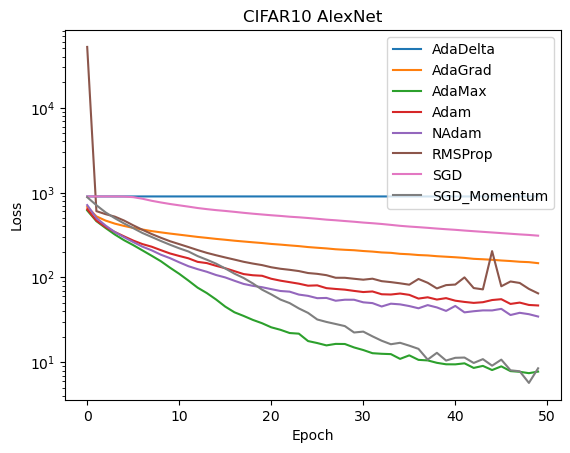

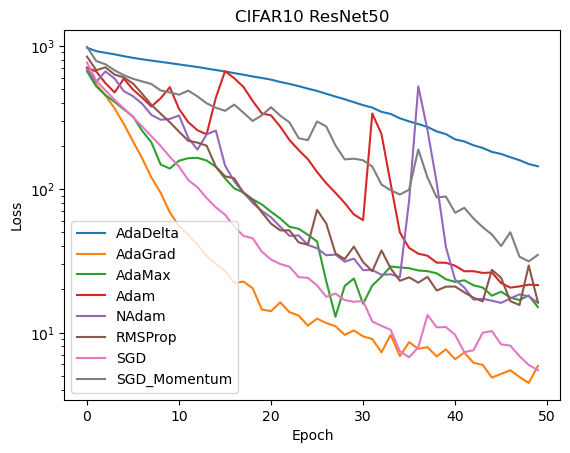

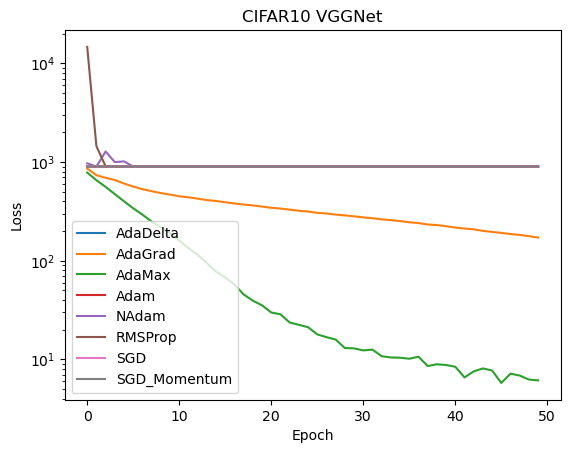

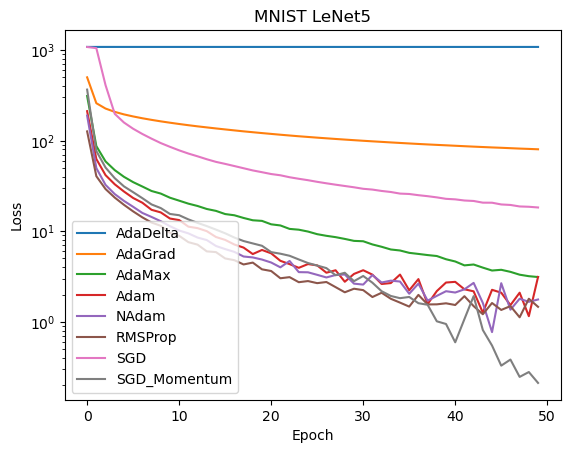

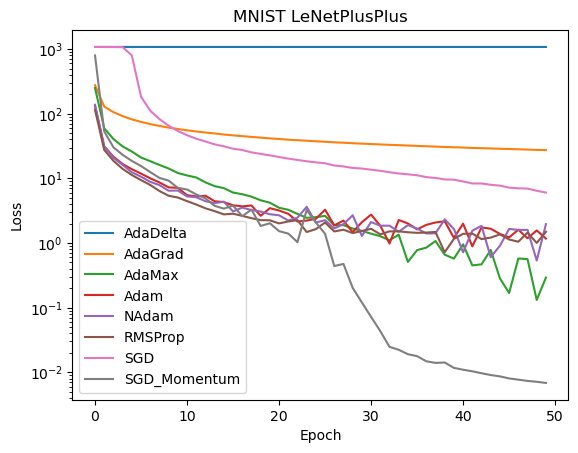

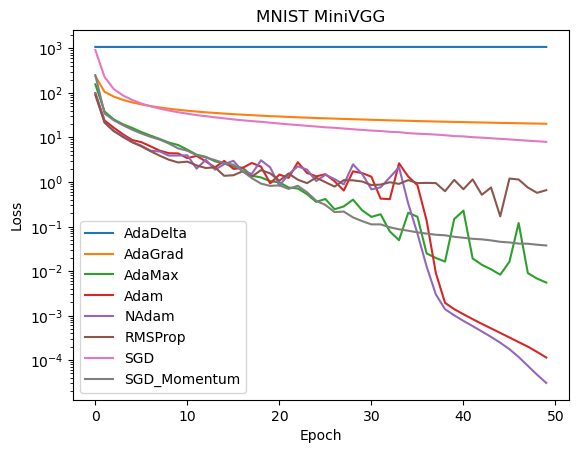

In [27]:
multi_index_df = df.pivot_table(values='Loss', index='Epoch', columns=['Model', 'Optimization'])

# Plot losses per epoch for every optimization, making a plot for every model
for model in multi_index_df.columns.levels[0]:
    model_df = multi_index_df[model]
    # model_df.plot()
    ax = model_df.plot(legend=True)
    ax.legend(loc='best')
    plt.yscale('log')
    plt.title(model)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

In [34]:
multi_index_df.loc[:, ('CIFAR10 VGGNet', slice(None))]

Model        CIFAR10 VGGNet                                                   \
Optimization       AdaDelta     AdaGrad      AdaMax        Adam        NAdam   
Epoch                                                                          
0                900.324481  858.113028  781.371607  901.670763   971.082453   
1                900.319452  736.456609  654.966427  900.451538   900.459828   
2                900.325119  692.074652  560.160976  900.388819  1279.484069   
3                900.317772  657.982773  473.158383  900.439673   998.908289   
4                900.318069  606.048164  400.429793  900.428286  1015.053876   
5                900.317378  564.557081  339.993283  900.407715   900.440767   
6                900.317119  531.041557  293.233833  900.434492   900.375293   
7                900.317042  506.969839  249.435479  900.485467   900.395346   
8                900.316486  484.877075  218.431296  900.455137   900.372554   
9                900.315636  467.917042  190.708240  900.359925   900.405858   
10               900.315800  450.078150  160.330035  900.370284   900.383919   
11               900.315406  439.377343  134.348176  900.412302   900.365556   
12               900.315221  425.785195  115.084168  900.358223   900.379193   
13               900.314790  411.783244   94.761811  900.356698   900.408592   
14               900.314594  402.920429   77.555327  900.349253   900.370802   
15               900.314261  391.489795   67.633295  900.356194   900.372554   
16               900.313998  380.440710   57.385549  900.357335   900.367874   
17               900.313614  371.255009   45.591731  900.350588   900.365192   
18               900.313478  363.648513   39.372499  900.357584   900.401424   
19               900.313315  353.725395   35.304047  900.352275   900.386593   
20               900.312917  344.017021   29.894561  900.349695   900.362257   
21               900.313040  337.758696   28.653638  900.355726   900.365165   
22               900.312707  329.423626   23.669283  900.353932   900.357067   
23               900.312610  321.175338   22.409462  900.354871   900.385358   
24               900.312573  314.895034   21.201445  900.351785   900.374441   
25               900.312377  305.764734   17.925746  900.350895   900.371317   
26               900.312144  301.080395   16.813083  900.348614   900.368459   
27               900.312187  293.410970   15.918469  900.356144   900.367677   
28               900.312154  288.046543   13.029993  900.350892   900.363862   
29               900.312026  281.845824   12.947765  900.359496   900.355717   
30               900.311741  275.092611   12.336796  900.354042   900.362297   
31               900.311818  269.765236   12.570970  900.355781   900.360450   
32               900.311901  262.742820   10.783127  900.349843   900.359831   
33               900.311653  257.771379   10.469530  900.349788   900.348536   
34               900.311592  252.445054   10.403457  900.350324   900.355503   
35               900.311571  245.333245   10.164173  900.349707   900.358619   
36               900.311581  240.912338   10.636828  900.354596   900.346204   
37               900.311466  232.839341    8.573974  900.350798   900.349962   
38               900.311297  229.896311    8.925521  900.349679   900.374710   
39               900.311297  223.643075    8.781213  900.354352   900.353827   
40               900.311327  216.820268    8.425898  900.352200   900.354020   
41               900.311333  212.001788    6.571760  900.360202   900.344556   
42               900.311251  208.116279    7.563389  900.351067   900.354074   
43               900.311209  200.761550    8.099227  900.350876   900.347603   
44               900.311193  196.027961    7.721990  900.354844   900.352682   
45               900.311246  191.380825    5.778471  900.352007   900.353280   
46               900.311257  186.629105    7.169304  900.352455   900.348949   
